In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as skl

In [2]:
data = pd.read_csv("../data/papers_pop_pib.csv")

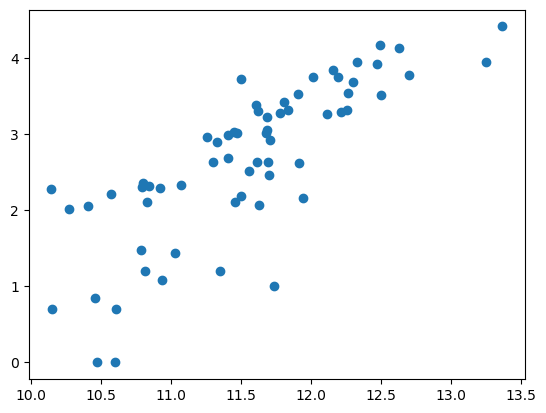

In [3]:
plt.scatter(np.log10(data["PIB"]), np.log10(data["Papers"]))

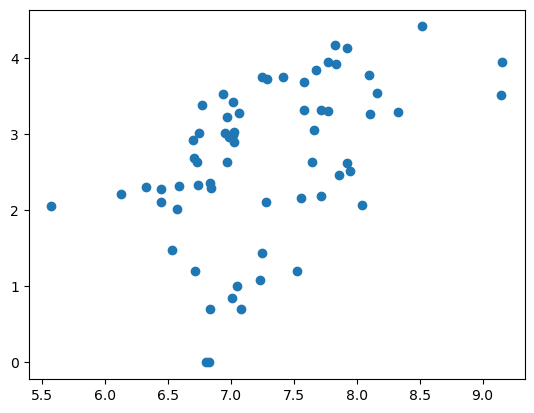

In [4]:
plt.scatter(np.log10(data["Pop"]), np.log10(data["Papers"]))

In [5]:
papers_col = float(data["Papers"][data["Country"]=="COL"])
pib_col = float(data["PIB"][data["Country"]=="COL"])
pop_col = float(data["Pop"][data["Country"]=="COL"])

print(papers_col, pib_col, pop_col)
ii = data["Papers"]>=papers_col
X = np.array([np.log10(data["PIB"][ii]), np.log10(data["Pop"][ii])])
X = X.T
Y = np.array([np.log10(data["Papers"][ii])])
Y = Y.T
paises = np.array(data["Country"][ii])

154.0 318511813577.0 51516562.0


In [6]:
def find_best_fit(X, Y):
    reg = skl.LinearRegression().fit(X, Y)
    return reg.coef_, reg.intercept_, reg.score(X,Y)

In [7]:
def new_data_from_bootstrap(X, Y):
    n = len(Y)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return X[new_ids,:], Y[new_ids]

In [8]:
def bootstrap_results(X, Y, n_bootstrap=100):
    coefs = []
    intercepts = []
    scores = []
    for i in range(n_bootstrap):
        new_X, new_Y = new_data_from_bootstrap(X,Y)
        coef, intercept, score = find_best_fit(new_X, new_Y)
        coefs.append(coef)
        intercepts.append(intercept)
        scores.append(score)
    return np.array(coefs), np.array(intercepts), np.array(scores)

In [9]:
n_bootstrap = 1000
coefs, intercepts, scores = bootstrap_results(X,Y, n_bootstrap=n_bootstrap)

1.048173366546123 -0.287465714369853 -7.0411200091130395


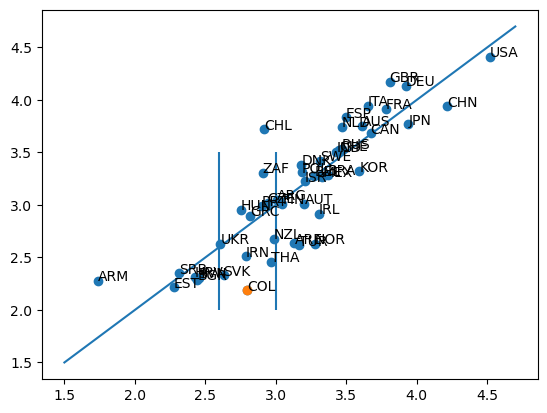

In [10]:
best_coefs = np.median(coefs, axis=0)
best_intercept = np.mean(intercepts, axis=0)
new_X = best_coefs[0,0]*X[:,0] + best_coefs[0,1]*X[:,1] + best_intercept[0]
n_points = 40
theory_X = np.linspace(1.5, 4.7, n_points)
plt.scatter(new_X, Y)
new_X_col = best_coefs[0,0]*np.log10(pib_col) + best_coefs[0,1]*np.log10(pop_col) + best_intercept[0]
plt.scatter(new_X_col, np.log10(papers_col))
plt.plot(theory_X, theory_X)
print(best_coefs[0,0], best_coefs[0,1], best_intercept[0])
for i, p in enumerate(paises):
    new_X_p = best_coefs[0,0]*X[i,0] + best_coefs[0,1]*X[i,1] + best_intercept[0]
    Y_p = Y[i]
    plt.text(new_X_p, Y_p,p)
#plt.xlim(2.2,3.5)
#plt.ylim(2.0,3.5)
plt.vlines(3, 2.0, 3.5)
plt.vlines(2.6, 2.0, 3.5)

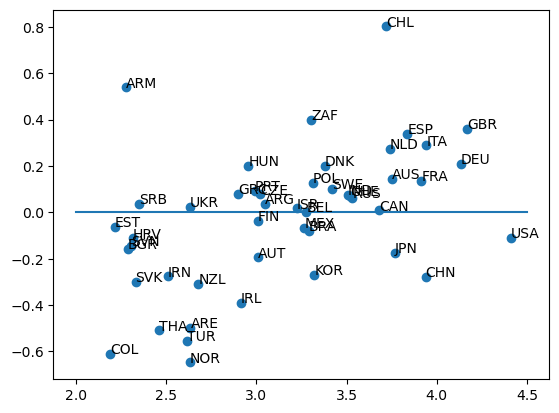

In [11]:
difference = Y[:,0] - new_X
plt.scatter(Y, difference)

for i, p in enumerate(paises):
    Y_p = Y[i]
    diff_p = difference[i]
    plt.text(Y_p, diff_p, p)
    

n_points = 100
x_line = np.linspace(2.0, 4.5, n_points)
z_line = np.zeros(n_points)
plt.plot(x_line, z_line)

In [12]:
Y[:,0]

array([4.41099643, 4.16964505, 4.13203544, 3.94146174, 3.93821942,
       3.9145547 , 3.83581735, 3.76774937, 3.75327657, 3.74138799,
       3.71974549, 3.68250609, 3.53173431, 3.51943419, 3.50582803,
       3.41796964, 3.38075377, 3.32097668, 3.31154196, 3.30556631,
       3.28914284, 3.27715061, 3.26481782, 3.22375545, 3.04610479,
       3.02036128, 3.0094509 , 3.00817418, 2.99211149, 2.95520654,
       2.91539984, 2.897077  , 2.67851838, 2.63447727, 2.63042788,
       2.6294096 , 2.61489722, 2.51054501, 2.45939249, 2.35024802,
       2.33041377, 2.31386722, 2.30749604, 2.28780173, 2.2764618 ,
       2.21484385, 2.18752072])

1.045870530241913 0.12866869040610374
-0.2870959313105154 0.11655576515466338
-7.0411200091130395 0.893637850207431


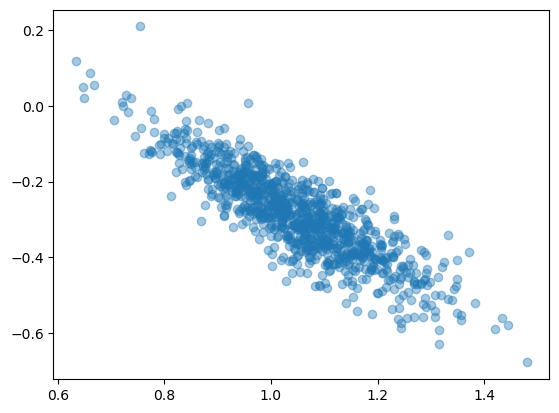

In [13]:
plt.scatter(coefs[:,0,0], coefs[:,0,1], alpha=0.4)
print(np.mean(coefs[:,0,0]), np.std(coefs[:,0,0]))
print(np.mean(coefs[:,0,1]), np.std(coefs[:,0,1]))
print(np.mean(intercepts[:,0]), np.std(intercepts[:,0]))

0.7631836806821143 0.06137555657002791


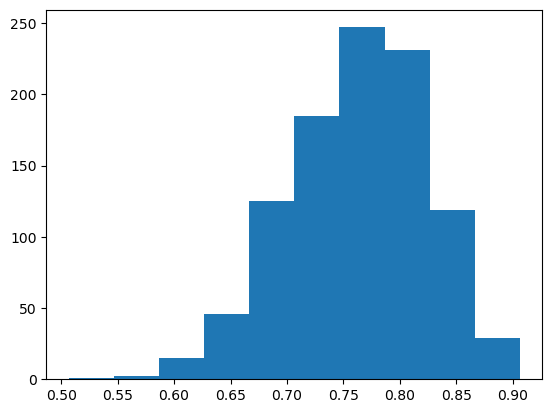

In [14]:
plt.hist(scores)
print(scores.mean(), scores.std())

In [18]:
mean_diff = np.zeros(len(paises))
std_diff = np.zeros(len(paises))
for l, p in enumerate(paises):
    log10_papers = np.zeros(n_bootstrap)
    diff_log10_papers = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        coef_A = coefs[i,0,0]
        coef_B = coefs[i,0,1]
        inter = intercepts[i,0]
        log10_papers[i] = coef_A * X[l,0] + coef_B * X[l,1] + inter
        diff_log10_papers[i] = Y[l]-(log10_papers[i]) 
    mean_diff[l] = np.mean(diff_log10_papers)
    std_diff[l] = np.std(diff_log10_papers)

In [19]:
mean_diff

array([-0.08230515,  0.38725995,  0.23628876,  0.31457788, -0.25130778,
        0.16066561,  0.36281141, -0.14784387,  0.16953917,  0.2984594 ,
        0.82574278,  0.03486981,  0.08855626,  0.09628604,  0.10177708,
        0.12630742,  0.22417403, -0.24533928,  0.15178384,  0.42195123,
       -0.0557219 ,  0.02731148, -0.04176577,  0.0413885 ,  0.06216877,
        0.102163  , -0.16990694, -0.01332502,  0.11661887,  0.22552587,
       -0.36702226,  0.10320993, -0.28511299, -0.47407904,  0.04656701,
       -0.62313901, -0.52896812, -0.25287021, -0.48501022,  0.05814122,
       -0.27650594, -0.08998543, -0.12203521, -0.13368143,  0.56054154,
       -0.04112739, -0.58807071])

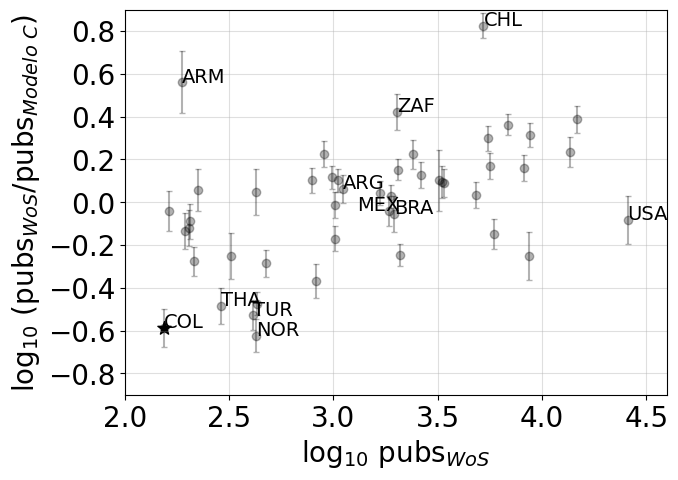

In [69]:
selection = ['COL', 'MEX', 'CHL','ZAF','USA', 'BRA', 'ARG','THA','TUR','ARM','NOR']
plt.figure(figsize=(7,5))
for i, p in enumerate(paises):
    if p in selection:
        if p=='MEX':
            plt.text(Y[i]-0.15, mean_diff[i], p, fontsize=14)
        else:
            plt.text(Y[i], mean_diff[i], p, fontsize=14)
        if p=='COL':
            diff_col = mean_diff[i]
            Y_col = Y[i]
            
plt.errorbar(Y, mean_diff, yerr=std_diff, marker='o', linestyle='none', alpha=0.3, capsize=2,color='black')

plt.scatter(Y_col, diff_col, color='black', s=100, marker='*')

#n_points = 100
#x_line = np.linspace(2.0, 4.6, n_points)
#z_line = np.zeros(n_points)
#plt.plot(x_line, z_line)
plt.xlim(2,4.6)
plt.ylim(-0.9, 0.9)
plt.grid(alpha=0.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\log_{10}$ pubs$_{WoS}$', fontsize=20)
plt.ylabel('$\log_{10}$ (pubs$_{WoS}$/pubs$_{Modelo\ C}$)', fontsize=20)
plt.savefig('pubs_modelo.jpg', bbox_inches='tight')

In [43]:
10**0.5

3.1622776601683795

In [18]:
ratio = 10**(log10_papers)/ papers_col
print(ratio.mean(), ratio.std())

3.993105892163344 0.8144326854969948
